# Parkinson's Disease Detection using Support Vector Machine Classifier

## Importing the libraries 

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Importing the dataset and performing exploratory data analysis

In [49]:
# importing the dataset onto a dataframe
parkinson = pd.read_csv('Parkinson_data.csv')

In [51]:
# displaying the first 5 records of the dataset
parkinson.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [53]:
# finding the number of records and attributes of the dataset
parkinson.shape

(195, 24)

In [55]:
# checking for missing values 
# if non-null values = 195, means no missing values
parkinson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [57]:
parkinson.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [59]:
# finding the distribution of status variable (0 -> no disease, 1 -> Parkinson's positive)
parkinson['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [61]:
# grouping the data based on the status variable
parkinson.groupby('status').mean()

TypeError: agg function failed [how->mean,dtype->object]

## Data pre-processing 

In [64]:
# separating the features and the target(status) variable
X = parkinson.drop(columns = ['name', 'status'], axis = 1)
Y = parkinson['status']

In [66]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [68]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


## Train Test Split 

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [73]:
# checking the size of train test data
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


## Performing data standardization 

In [76]:
# creating an instance of StandardScaler dependency
scaler = StandardScaler()

In [78]:
scaler.fit_transform(X_train)

array([[ 0.63239631, -0.02731081, -0.87985049, ..., -0.97586547,
        -0.55160318,  0.07769494],
       [-1.05512719, -0.83337041, -0.9284778 , ...,  0.3981808 ,
        -0.61014073,  0.39291782],
       [ 0.02996187, -0.29531068, -1.12211107, ..., -0.43937044,
        -0.62849605, -0.50948408],
       ...,
       [-0.9096785 , -0.6637302 , -0.160638  , ...,  1.22001022,
        -0.47404629, -0.2159482 ],
       [-0.35977689,  0.19731822, -0.79063679, ..., -0.17896029,
        -0.47272835,  0.28181221],
       [ 1.01957066,  0.19922317, -0.61914972, ..., -0.716232  ,
         1.23632066, -0.05829386]])

In [80]:
scaler.fit_transform(X_test)

array([[-1.27434768e+00, -7.92100902e-01, -6.42064804e-01,
        -3.70550081e-02,  7.65593976e-01, -5.36663194e-02,
         2.70521702e-01, -5.17113412e-02, -1.73362776e-01,
        -1.84537779e-01, -2.46162360e-01, -9.53432617e-02,
         3.51764171e-02, -2.46253875e-01, -2.42578071e-01,
        -5.71526263e-01,  1.17904437e+00,  1.05108661e+00,
         5.45105104e-01,  2.12053870e+00,  2.20220746e-01,
         6.73407367e-01],
       [-9.93036290e-01, -7.55457877e-01, -6.02839911e-01,
         2.21517439e+00,  2.37519856e+00,  2.52231701e+00,
         1.86180632e+00,  2.52056878e+00,  6.63120841e-01,
         1.31330947e+00,  8.25344625e-01,  4.41243374e-01,
         3.16150237e-01,  8.25821477e-01,  7.63822230e-01,
        -1.17294582e+00,  9.93607948e-01,  1.27956439e+00,
         9.15137942e-01,  4.60066283e-01,  1.91967718e-01,
         1.05151668e+00],
       [-9.59040068e-01, -4.67857304e-01, -5.93333267e-01,
         1.66162458e+00,  1.97279742e+00,  1.61932286e+00,
    

## Training the model using a Support Vector Machine Classifier 

In [83]:
parkinson_model = svm.SVC(kernel='linear')

In [85]:
parkinson_model.fit(X_train.values, Y_train.values)

SVC(kernel='linear')

## Model Evaluation

In [88]:
# finding the accuracy score on training data
X_train_prediction = parkinson_model.predict(X_train.values)
train_data_accuracy = accuracy_score(Y_train.values, X_train_prediction)

In [90]:
# displaying accuracy score on training data
print("Accuracy on training data: ", train_data_accuracy)

Accuracy on training data:  0.8717948717948718


In [92]:
# finding the accuracy score on test data
X_test_prediction = parkinson_model.predict(X_test.values)
test_data_accuracy = accuracy_score(Y_test.values, X_test_prediction)

In [94]:
# displaying accuracy score on test data
print("Accuracy on test data: ", test_data_accuracy)

Accuracy on test data:  0.8717948717948718


<Axes: >

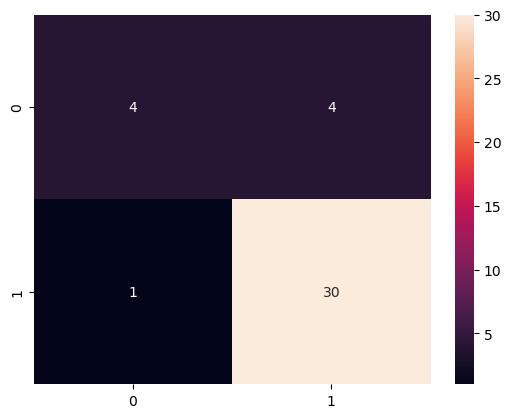

In [96]:
# displaying the confusion matrix
cm = confusion_matrix(Y_test, X_test_prediction)
sns.heatmap(cm, annot=True)

In [97]:
# displaying the model's performance
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       0.88      0.97      0.92        31

    accuracy                           0.87        39
   macro avg       0.84      0.73      0.77        39
weighted avg       0.87      0.87      0.86        39



## Building a predictive system 

In [101]:
input_data = (117.274,129.916,110.402,0.00752,0.00006,0.00299,0.00469,0.00898,0.02293,0.221,0.01189,0.01459,0.01948,0.03568,0.00681,22.817,0.530529,0.817756,-4.60826,0.290024,2.021591,0.314464)
input_np = np.asarray(input_data)
input_reshaped = input_np.reshape(1, -1)

#standardizing the input data
standardized_data = scaler.fit_transform(input_reshaped)


prediction = parkinson_model.predict(standardized_data)

# printing the prediction
if (prediction[0] == 0):
    print("The person does not have Parkinson's disease")
else:
    print("The person has Parkinson's disease")

The person has Parkinson's disease


## Saving the trained model

In [104]:
import pickle

In [106]:
filename = 'parkinson_model.sav'

In [110]:
pickle.dump(parkinson_model, open(filename, 'wb'))